In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# Making a copy of dataframe
df_new=df.copy()

In [7]:
df_new.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [8]:
# Dropping null values 
df_new.dropna(inplace=True)

In [9]:
df_new.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [11]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [12]:
# Converting Data types of Date_of_Journey,Dep_Time,Arrival_Time to DateTime
def convertdatatypes(col):
    df_new[col]=pd.to_datetime(df_new[col])

In [13]:
lst=["Date_of_Journey","Dep_Time","Arrival_Time"]
for features in lst:
    convertdatatypes(features)

In [14]:
df_new.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
df_new.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-18 05:50:00,2024-03-18 13:15:00,7h 25m,2 stops,No info,7662


In [16]:
# Extracting Year,Month,Date from Date_of_Journey feature
df_new["Year"]=df_new["Date_of_Journey"].dt.year
df_new["Month"]=df_new["Date_of_Journey"].dt.month
df_new["Day"]=df_new["Date_of_Journey"].dt.day

In [17]:
df_new.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2024-03-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-18 05:50:00,2024-03-18 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5


In [18]:
# Dropping Date_of_Journey feature as we have extracted year,month,day.Hence this column is not required
df_new.drop(["Date_of_Journey"],axis=1,inplace=True)

In [19]:
df_new.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-18 05:50:00,2024-03-18 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5


In [20]:
# Extracting Hour and Minutes from Dep_Time and Arrival_Time column

def exthrmin(col):
    df_new[col+"hr"]=df_new[col].dt.hour
    df_new[col+"min"]=df_new[col].dt.minute

In [21]:
lst1=["Dep_Time","Arrival_Time"]

for features in lst1:
    exthrmin(features)

In [22]:
df_new.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin
0,IndiGo,Banglore,New Delhi,BLR → DEL,2024-03-18 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2024-03-18 05:50:00,2024-03-18 13:15:00,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15


In [23]:
# Dropping Dep_Time and Arrival_Time feature as we have extracted hour and minute.Hence this column is not required
df_new.drop(["Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [24]:
df_new.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,2019,1,5,5,50,13,15


In [25]:
df_new["Year"].unique()

array([2019], dtype=int64)

In [26]:
# Dropping Year column as we noticed that this datset contains only one year data i.e 2019,so we can drop this column
df_new.drop(["Year"],axis=1,inplace=True)

In [27]:
df_new.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [28]:
# Analysing Route Column
df_new["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [29]:
# Dropping Route features as we have Source and Destination column.So these features will not be useful in Model Building
df_new.drop(["Route"],axis=1,inplace=True)

In [30]:
df_new.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [31]:
# Analysing Duration features
df_new["Duration"]

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [32]:
# Converting Duration to Minutes
df_new["Duration_in_Minutes"]=df_new["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [33]:
df_new["Duration_in_Minutes"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_in_Minutes, Length: 10682, dtype: int64

In [34]:
df_new.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,Duration_in_Minutes
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,3,24,22,20,1,10,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,445


In [35]:
# Now Dropping Duration Column
df_new.drop(["Duration"],axis=1,inplace=True)

In [36]:
df_new.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,Duration_in_Minutes
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,3,24,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,445


<AxesSubplot:xlabel='Duration_in_Minutes', ylabel='Price'>

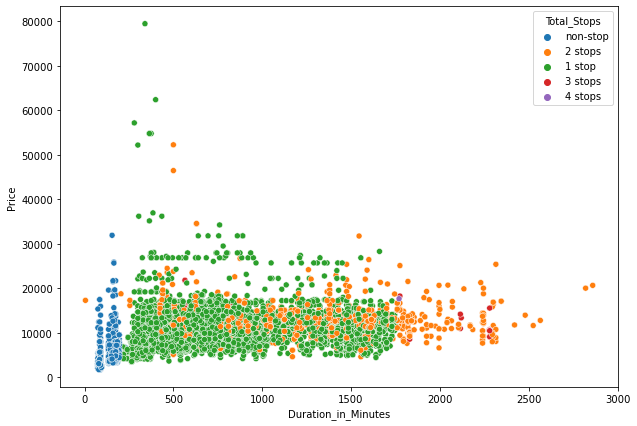

In [37]:
# Analysing Duration_in_minutes vs Price Feature
plt.figure(figsize=(10,7))
sns.scatterplot(x="Duration_in_Minutes",y="Price",hue="Total_Stops",data=df_new)

In [38]:
df_new.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Month', 'Day', 'Dep_Timehr', 'Dep_Timemin', 'Arrival_Timehr',
       'Arrival_Timemin', 'Duration_in_Minutes'],
      dtype='object')

In [39]:
# Analysing Total_Stops Feature

df_new["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [40]:
replace_dict={'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4}
df_new["Total_Stops"].replace(replace_dict,inplace=True)

In [41]:
df_new["Total_Stops"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [42]:
df_new.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,Duration_in_Minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,3,24,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,445


In [43]:
# Analysing Additional_Info Column
df_new["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [44]:
# Dropping Additional_Info column as it is not useful in Model Building
df_new.drop(['Additional_Info'],axis=1,inplace=True)

In [45]:
df_new.head(2)

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,Duration_in_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445


In [46]:
# Converting Source column and Destination column to Numerical using one-hot-encoding
one_hot_encoding=pd.get_dummies(df_new['Source'],prefix='Source')
one_hot_encoding

,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0
...,...,...,...,...,...
10678,0,0,0,1,0
10679,0,0,0,1,0
10680,1,0,0,0,0
10681,1,0,0,0,0


In [47]:
df_new=pd.concat([df_new,one_hot_encoding],axis=1)

In [48]:
df_new.head(2)

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,Duration_in_Minutes,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445,0,0,0,1,0


In [49]:
one_hot_encoding_dest=pd.get_dummies(df_new["Destination"],prefix="Destination")
one_hot_encoding_dest

,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
10678,1,0,0,0,0,0
10679,1,0,0,0,0,0
10680,0,0,1,0,0,0
10681,0,0,0,0,0,1


In [50]:
df_new=pd.concat([df_new,one_hot_encoding_dest],axis=1)

In [51]:
df_new.head(2)

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,1,0,1,0,0,0,0,0


In [52]:
# Dropping Source and Destination Column
df_new.drop(["Source","Destination"],axis=1,inplace=True)

In [53]:
df_new.head(2)

,Airline,Total_Stops,Price,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,Duration_in_Minutes,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,0,3897,3,24,22,20,1,10,170,...,0,0,0,0,0,0,0,0,0,1
1,Air India,2,7662,1,5,5,50,13,15,445,...,0,0,1,0,1,0,0,0,0,0


In [54]:
# Converting Airline Column into Numerical
df_new["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [55]:
from sklearn.preprocessing import LabelEncoder
lbl_enc=LabelEncoder()

df_new["Airline_encoded"]=lbl_enc.fit_transform(df_new["Airline"])

In [56]:
df_new.head(2)

,Airline,Total_Stops,Price,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,Duration_in_Minutes,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_encoded
0,IndiGo,0,3897,3,24,22,20,1,10,170,...,0,0,0,0,0,0,0,0,1,3
1,Air India,2,7662,1,5,5,50,13,15,445,...,0,1,0,1,0,0,0,0,0,1


In [57]:
# Now dropping Airline column
df_new.drop(["Airline"],axis=1,inplace=True)

In [58]:
df_new.head(2)

,Total_Stops,Price,Month,Day,Dep_Timehr,Dep_Timemin,Arrival_Timehr,Arrival_Timemin,Duration_in_Minutes,Source_Banglore,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Airline_encoded
0,0,3897,3,24,22,20,1,10,170,1,...,0,0,0,0,0,0,0,0,1,3
1,2,7662,1,5,5,50,13,15,445,0,...,0,1,0,1,0,0,0,0,0,1


# Model Building

In [62]:
X=df_new.drop(["Price"],axis=1)
Y=df_new["Price"]

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [67]:
# Appying Random Forest Model

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
predict_rf=rf.predict(X_test)

In [69]:
print(predict_rf)

[16665.96        6120.24        8956.75       ...  6783.2
 12967.451      12954.09021429]


In [92]:
from sklearn.metrics import r2_score

In [77]:
print(r2_score(Y_test,predict_rf))

0.7764156813180652


In [78]:
# Random Forest Regression is giving R2 Score of 77.64%

In [79]:
# Applying Decision Tree

from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
predict_dt=dt.predict(X_test)

In [80]:
print(predict_dt)

[16840.  5752.  9187. ...  6152. 13339. 14335.]


In [81]:
print(r2_score(Y_test,predict_dt))

0.6691001096548321


In [82]:
# Decision Tree Regression is giving R2 Score of 66.91%

In [83]:
# Applying LinearRegression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
predict_lr=lr.predict(X_test)

In [84]:
print(predict_lr)

[13119.30013197  9762.46610813 11423.87662456 ...  8275.20130517
  8824.01293063  9953.44518094]


In [85]:
print(r2_score(Y_test,predict_lr))

0.464890674465845


In [93]:
#Linear Regression predicting R2 score of 46.48%

In [96]:
# Applying KNN model
from sklearn.neighbors import KNeighborsRegressor as KNN
knn=KNN()
knn.fit(X_train,Y_train)
predict_knn=knn.predict(X_test)

In [97]:
print(predict_knn)

[16315.   5158.2  8441.6 ...  6471.8  9573.4 11467.6]


In [98]:
print(r2_score(Y_test,predict_knn))

0.5312951712952587


In [99]:
#KNN predicting R2 score of 53.12%

In [101]:
# Applying Random Forest Hyperparameter

# np.linspace(start=100,stop=1000,num=6)

array([ 100.,  280.,  460.,  640.,  820., 1000.])

In [105]:
# Hypertuning Parameters in Random Forest
n_estimators=[ int(x) for x in np.linspace(start=100,stop=1000,num=6)]
max_features=["auto","sqrt","root"]
max_depth= [int(x) for x in np.linspace(start=5,stop=30,num=4)]
min_samples_split=[5,10,15,100]

In [106]:
rf_dict={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [107]:
rf_dict

{'n_estimators': [100, 280, 460, 640, 820, 1000],
 'max_features': ['auto', 'sqrt', 'root'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [108]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
reg_rf=RandomForestRegressor()

In [117]:
rsc=RandomizedSearchCV(estimator=reg_rf,param_distributions=rf_dict,cv=5,random_state=42)
rsc

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'root'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 280, 460, 640,
                                                         820, 1000]},
                   random_state=42)

In [118]:
rsc.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'root'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 280, 460, 640,
                                                         820, 1000]},
                   random_state=42)

In [116]:
rsc.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 30}

In [119]:
prediction_rsc=rsc.predict(X_test)

In [120]:
print(prediction_rsc)

[16366.12025474  6159.21491235  8780.42196055 ...  6706.81031977
 12210.52626354 12877.98902307]


In [121]:
print(r2_score(Y_test,prediction_rsc))

0.826815363376128


In [ ]:
# By using Randomized Search CV the R2 Score increased from 77.64% to 82.68%